In [1]:
pip install xlrd

     |████████████████████████████████| 96 kB 376 kB/s 
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install openpyxl

     |████████████████████████████████| 243 kB 420 kB/s 
  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8913 sha256=efca57c439a85f4e0fa34251b949d0ba21528a5c8e72ba3e1231386b5fafd88f
  Stored in directory: /root/.cache/pip/wheels/e2/bd/55/048b4fd505716c4c298f42ee02dffd9496bb6d212b266c7f31
Successfully built et-xmlfile
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas_datareader
import datetime
import pandas_datareader.data as web
ewd = pd.read_excel('../input/personal-project-ewd/EWD.xlsx')
ewd

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Shipping Cost,Profit,Order Priority
0,10015130-41636-1,2018-12-29,2019-01-03,Normal,AB10015130,Consumer,Bangkok,Bangkok,Thailand,Southeastern Asia,OFR-FU-5727,Office Furniture,Furnishings,"Rubbermaid Frame, Black",561.5379,7,0.27,34.26,-0.0021,Medium
1,10015130-41636-2,2018-12-29,2019-01-03,Normal,AB10015130,Consumer,Bangkok,Bangkok,Thailand,Southeastern Asia,TEC-CO-4576,Technology,Copiers,"Hewlett Fax Machine, Digital",402.6456,2,0.37,29.09,12.7656,Medium
2,10015130-41636-3,2018-12-29,2019-01-03,Normal,AB10015130,Consumer,Bangkok,Bangkok,Thailand,Southeastern Asia,TEC-CO-3594,Technology,Copiers,"Brother Fax and Copier, Laser",241.2774,2,0.37,18.17,-68.9826,Medium
3,10015130-41636-4,2018-12-29,2019-01-03,Normal,AB10015130,Consumer,Bangkok,Bangkok,Thailand,Southeastern Asia,OFS-BI-6382,Office Supplies,Binders,"Wilson Jones Binding Machine, Clear",200.9430,5,0.17,12.67,4.7430,Medium
4,10015130-41636-5,2018-12-29,2019-01-03,Normal,AB10015130,Consumer,Bangkok,Bangkok,Thailand,Southeastern Asia,TEC-PH-5340,Technology,Phones,"Nokia Headset, Full Size",123.5040,2,0.17,7.79,20.7840,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520,Z2144527-41927-1,2019-10-16,2019-10-21,Next Day,TZ2144527,Corporate,Harbin,Heilongjiang,China,Eastern Asia,OFR-BO-3627,Office Furniture,Bookcases,"Bush Classic Bookcase, Traditional",825.3600,2,0.00,99.70,49.5000,High
5521,Z2144527-41927-2,2019-10-16,2019-10-21,Next Day,TZ2144527,Corporate,Harbin,Heilongjiang,China,Eastern Asia,OFS-BI-3713,Office Supplies,Binders,"Cardinal 3-Hole Punch, Durable",60.6000,2,0.00,6.28,24.2400,High
5522,Z2144527-41927-3,2019-10-16,2019-10-21,Next Day,TZ2144527,Corporate,Harbin,Heilongjiang,China,Eastern Asia,OFS-LA-5402,Office Supplies,Labels,"Novimex Shipping Labels, 5000 Label Set",22.7400,2,0.00,3.19,11.1000,High
5523,Z2144527-42300-1,2020-10-23,2020-10-26,Next Day,TZ2144527,Corporate,Luoyang,Guangdong,China,Eastern Asia,OFR-BO-3646,Office Furniture,Bookcases,"Bush Stackable Bookrack, Mobile",617.5500,5,0.00,181.87,172.8000,Critical


In [4]:
#inserting all new columns: 'Discount Value', 'Cost of Goods Sold' and 'Details'
ewd['Discount Value'] = ewd['Discount']*ewd['Sales']
ewd['Cost of Goods Sold'] = ewd['Sales']-ewd['Profit']-ewd['Discount Value']- ewd['Shipping Cost']
ewd['Details'] = ewd['Quantity'].astype(str) + ' ' + ewd['Sub-Category']
ewd

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Country,Region,...,Product Name,Sales,Quantity,Discount,Shipping Cost,Profit,Order Priority,Discount Value,Cost of Goods Sold,Details
0,10015130-41636-1,2018-12-29,2019-01-03,Normal,AB10015130,Consumer,Bangkok,Bangkok,Thailand,Southeastern Asia,...,"Rubbermaid Frame, Black",561.5379,7,0.27,34.26,-0.0021,Medium,151.615233,375.664767,7 Furnishings
1,10015130-41636-2,2018-12-29,2019-01-03,Normal,AB10015130,Consumer,Bangkok,Bangkok,Thailand,Southeastern Asia,...,"Hewlett Fax Machine, Digital",402.6456,2,0.37,29.09,12.7656,Medium,148.978872,211.811128,2 Copiers
2,10015130-41636-3,2018-12-29,2019-01-03,Normal,AB10015130,Consumer,Bangkok,Bangkok,Thailand,Southeastern Asia,...,"Brother Fax and Copier, Laser",241.2774,2,0.37,18.17,-68.9826,Medium,89.272638,202.817362,2 Copiers
3,10015130-41636-4,2018-12-29,2019-01-03,Normal,AB10015130,Consumer,Bangkok,Bangkok,Thailand,Southeastern Asia,...,"Wilson Jones Binding Machine, Clear",200.9430,5,0.17,12.67,4.7430,Medium,34.160310,149.369690,5 Binders
4,10015130-41636-5,2018-12-29,2019-01-03,Normal,AB10015130,Consumer,Bangkok,Bangkok,Thailand,Southeastern Asia,...,"Nokia Headset, Full Size",123.5040,2,0.17,7.79,20.7840,Medium,20.995680,73.934320,2 Phones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520,Z2144527-41927-1,2019-10-16,2019-10-21,Next Day,TZ2144527,Corporate,Harbin,Heilongjiang,China,Eastern Asia,...,"Bush Classic Bookcase, Traditional",825.3600,2,0.00,99.70,49.5000,High,0.000000,676.160000,2 Bookcases
5521,Z2144527-41927-2,2019-10-16,2019-10-21,Next Day,TZ2144527,Corporate,Harbin,Heilongjiang,China,Eastern Asia,...,"Cardinal 3-Hole Punch, Durable",60.6000,2,0.00,6.28,24.2400,High,0.000000,30.080000,2 Binders
5522,Z2144527-41927-3,2019-10-16,2019-10-21,Next Day,TZ2144527,Corporate,Harbin,Heilongjiang,China,Eastern Asia,...,"Novimex Shipping Labels, 5000 Label Set",22.7400,2,0.00,3.19,11.1000,High,0.000000,8.450000,2 Labels
5523,Z2144527-42300-1,2020-10-23,2020-10-26,Next Day,TZ2144527,Corporate,Luoyang,Guangdong,China,Eastern Asia,...,"Bush Stackable Bookrack, Mobile",617.5500,5,0.00,181.87,172.8000,Critical,0.000000,262.880000,5 Bookcases


In [5]:
# Sorting by Order ID
ewd.sort_values('Order ID',inplace = True)
ewd

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Country,Region,...,Product Name,Sales,Quantity,Discount,Shipping Cost,Profit,Order Priority,Discount Value,Cost of Goods Sold,Details
0,10015130-41636-1,2018-12-29,2019-01-03,Normal,AB10015130,Consumer,Bangkok,Bangkok,Thailand,Southeastern Asia,...,"Rubbermaid Frame, Black",561.5379,7,0.27,34.26,-0.0021,Medium,151.615233,375.664767,7 Furnishings
1,10015130-41636-2,2018-12-29,2019-01-03,Normal,AB10015130,Consumer,Bangkok,Bangkok,Thailand,Southeastern Asia,...,"Hewlett Fax Machine, Digital",402.6456,2,0.37,29.09,12.7656,Medium,148.978872,211.811128,2 Copiers
2,10015130-41636-3,2018-12-29,2019-01-03,Normal,AB10015130,Consumer,Bangkok,Bangkok,Thailand,Southeastern Asia,...,"Brother Fax and Copier, Laser",241.2774,2,0.37,18.17,-68.9826,Medium,89.272638,202.817362,2 Copiers
3,10015130-41636-4,2018-12-29,2019-01-03,Normal,AB10015130,Consumer,Bangkok,Bangkok,Thailand,Southeastern Asia,...,"Wilson Jones Binding Machine, Clear",200.9430,5,0.17,12.67,4.7430,Medium,34.160310,149.369690,5 Binders
4,10015130-41636-5,2018-12-29,2019-01-03,Normal,AB10015130,Consumer,Bangkok,Bangkok,Thailand,Southeastern Asia,...,"Nokia Headset, Full Size",123.5040,2,0.17,7.79,20.7840,Medium,20.995680,73.934320,2 Phones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520,Z2144527-41927-1,2019-10-16,2019-10-21,Next Day,TZ2144527,Corporate,Harbin,Heilongjiang,China,Eastern Asia,...,"Bush Classic Bookcase, Traditional",825.3600,2,0.00,99.70,49.5000,High,0.000000,676.160000,2 Bookcases
5521,Z2144527-41927-2,2019-10-16,2019-10-21,Next Day,TZ2144527,Corporate,Harbin,Heilongjiang,China,Eastern Asia,...,"Cardinal 3-Hole Punch, Durable",60.6000,2,0.00,6.28,24.2400,High,0.000000,30.080000,2 Binders
5522,Z2144527-41927-3,2019-10-16,2019-10-21,Next Day,TZ2144527,Corporate,Harbin,Heilongjiang,China,Eastern Asia,...,"Novimex Shipping Labels, 5000 Label Set",22.7400,2,0.00,3.19,11.1000,High,0.000000,8.450000,2 Labels
5523,Z2144527-42300-1,2020-10-23,2020-10-26,Next Day,TZ2144527,Corporate,Luoyang,Guangdong,China,Eastern Asia,...,"Bush Stackable Bookrack, Mobile",617.5500,5,0.00,181.87,172.8000,Critical,0.000000,262.880000,5 Bookcases


In [6]:
#Q6 Profits over the years for home office segment
ewd[ewd['Segment']=='Home Office'].groupby(ewd['Order Date'].map(lambda x: x.year)).sum()['Profit']
#Answer is 2018

Order Date
2017     6176.6910
2018     4849.9146
2019    11993.2746
2020    15626.0796
Name: Profit, dtype: float64

In [7]:
#Q6 Cumulative Porfits of the entire business unit
ewd.groupby('Segment').sum()['Profit']
# amswer is $38,645.96

Segment
Consumer       91134.4834
Corporate      54755.1318
Home Office    38645.9598
Name: Profit, dtype: float64

In [8]:
#Q6 grand profits for all Consumer, Corporate and Home Office
ewd.groupby('Segment').sum()['Profit'].sum()
#Grand total for all is $184,535.58

184535.57499999995

In [9]:
#Q7 List of subcategories that had cumulative negative profit and how much
ewd.groupby('Sub-Category').sum()['Profit'].sort_values()[:4]

Sub-Category
Tables        -24088.8831
Supplies        -620.2824
Fasteners       -144.8421
Accessories     -110.9205
Name: Profit, dtype: float64

In [10]:
#B8 Highest Quantity sold
ewd.groupby('Sub-Category').sum()[['Quantity','Sales']].sort_values('Quantity', ascending = False)
#Answer: Chair, $254,618.7822

,Quantity,Sales
Sub-Category,,
Chairs,1835,254618.7822
Binders,1779,31545.5907
Storage,1694,119264.3844
Labels,1386,10307.0280
Supplies,1333,33308.0676
Fasteners,1296,13582.3479
Furnishings,1268,50664.7059
Art,1256,32895.4569
Accessories,1225,76912.9695


In [11]:
#Q9 
pd.set_option('display.max_rows', ewd.shape[0]+1)
ewd.groupby([ewd['Sub-Category'],ewd['Order Date'].dt.year, ewd['Order Date'].dt.month]).agg({'Sales':sum})

Sales
Sub-Category Order Date Order Date            
Accessories  2017       1             450.3828
                        2             551.4525
                        3             665.2500
                        4            1186.0431
                        5             582.8100
                        6            2021.2722
                        7             744.3105
                        8            1272.5865
                        9             677.4591
                        10            251.5998
                        11           2372.5944
                        12           3255.8277
             2018       1             804.8526
                        2            1417.4586
                        3             713.6100
                        4             768.4602
                        5            2257.7646
                        6            3529.6557
                        7             421.6425
                        8            1995.2103
                        9            1685.3052
                        10           1990.3533
                        11           1144.6758
                        12            499.5162
             2019       1             113.9490
                        2            2068.8189
                        3             356.9220
                        4            2220.8208
                        5             779.0598
                        6            2018.4513
                        7            2505.4665
                        8            1779.9675
                        9            1412.0655
                        10           1491.5436
                        11           3056.8563
                        12            925.4331
             2020       1            1202.7732
                        2            2692.2132
                        3             258.3939
                        4             714.2523
                        5            4050.8646
                        6            3009.4596
                        7             701.0220
                        8            2411.2449
                        9            1241.1366
                        10           1550.5896
                        11           5797.8258
                        12           3293.7459
Appliances   2017       2            1752.3000
                        3            2967.5457
                        4            1542.5244
                        5            4783.7817
                        6            3402.6231
                        7            1852.3857
                        8            1752.2700
                        9            3777.7581
                        10           1284.0378
                        11           4724.6700
                        12           4723.4199
             2018       1            4181.6103
                        3             535.4400
                        5            2324.8101
                        6            2974.6950
                        7             166.8051
                        8            6858.4968
                        9            4106.5770
                        10           3687.9078
                        11           2373.2688
                        12           1026.7590
             2019       1            3739.0884
                        2             622.1400
                        3            2540.0988
                        4            1330.1208
                        5            3206.0922
                        6            7024.4421
                        7            4182.7020
                        8            4158.2466
                        9            1715.1606
                        10           5959.3683
                        11           1798.6764
                        12           1208.2923
             2020       1             346.9317
                        2             574.4859
                        3            3517.9965

In [12]:
#Q9 The total sales in dollar for the product sub category in that month
ewd.groupby([ewd['Sub-Category'],ewd['Order Date'].dt.year, ewd['Order Date'].dt.month]).agg({'Sales':sum}).max()
# After determining the max() we can locate it in our data above,
# So the answer is Bookcase, $20,318.87

Sales    20318.8662
dtype: float64

In [13]:
#Q10 shows all the aggregate profit figures across the years
ewd.groupby([ewd['Order Date'].dt.year]).agg({'Profit':sum}).transpose()
#Generally the business is profitable

Order Date,2017,2018,2019,2020
Profit,39156.6894,31358.1654,52172.8446,61847.8756


In [14]:
#Q10 Cumulative profits for all year combined
ewd.groupby([ewd['Order Date'].dt.year]).agg({'Profit':sum}).sum()
#Grand total for all is $184,535.58

Profit    184535.575
dtype: float64

In [15]:
#Q11 shows the quarter in a year 
ewd.groupby([ewd['Order Date'].dt.quarter]).agg({'Sales':sum}).transpose()
# Highest quarterly sale is 4th quarter

Order Date,1,2,3,4
Sales,303527.97,396412.6416,460312.6278,582157.4556


In [16]:
#Q11 Cumulative sales for all quarters combined
ewd.groupby([ewd['Order Date'].dt.quarter]).agg({'Sales':sum}).sum()
#Grand total for all is $1,742,410.695

Sales    1742410.695
dtype: float64

In [17]:
#Q12 returns profit margins of all Sub-Category
df = ewd.groupby('Sub-Category').sum()[['Sales','Profit']]
df['Profit Margin'] = df['Profit'] / df['Sales']*100
df

,Sales,Profit,Profit Margin
Sub-Category,,,
Accessories,76912.9695,-110.9205,-0.144216
Appliances,152602.1130,23904.9630,15.664896
Art,32895.4569,2943.4669,8.947944
Binders,31545.5907,5310.8307,16.835414
Bookcases,239826.7995,32324.1195,13.478110
Chairs,254618.7822,29915.4822,11.749126
Copiers,240275.2752,41584.1052,17.306860
Envelopes,25623.9216,1788.8316,6.981100
Fasteners,13582.3479,-144.8421,-1.066400


In [18]:
#Q13 Cumulative Sales of all Sub-Categores and Percentage of total sales 
df1 = ewd.groupby('Sub-Category').sum()[['Sales']]
df1['Percentage of Total Sales'] = df1['Sales']/df1['Sales'].sum()*100
df1

,Sales,Percentage of Total Sales
Sub-Category,,
Accessories,76912.9695,4.414170
Appliances,152602.1130,8.758102
Art,32895.4569,1.887928
Binders,31545.5907,1.810457
Bookcases,239826.7995,13.764080
Chairs,254618.7822,14.613018
Copiers,240275.2752,13.789819
Envelopes,25623.9216,1.470602
Fasteners,13582.3479,0.779515


In [19]:
#Q14 sort out what we want
df2 = ewd.groupby([ewd['Sub-Category'] ,ewd['Order Date'].dt.year]).agg({'Sales':sum})
df2

Sales
Sub-Category Order Date            
Accessories  2017        14031.5886
             2018        17228.5050
             2019        18729.3543
             2020        26923.5216
Appliances   2017        32563.3164
             2018        28236.3699
             2019        37484.4285
             2020        54317.9982
Art          2017         6056.0082
             2018         6311.0562
             2019         8556.8781
             2020        11971.5144
Binders      2017         5642.5293
             2018         6736.8558
             2019         9689.0523
             2020         9477.1533
Bookcases    2017        43494.8022
             2018        43455.9723
             2019        62954.1066
             2020        89921.9184
Chairs       2017        45394.5111
             2018        33369.7476
             2019        81799.5582
             2020        94054.9653
Copiers      2017        45122.1951
             2018        47869.1013
             2019        64754.2596
             2020        82529.7192
Envelopes    2017         5713.3125
             2018         5082.5805
             2019         6370.3533
             2020         8457.6753
Fasteners    2017         1907.6586
             2018         3717.5019
             2019         2911.2549
             2020         5045.9325
Furnishings  2017        10730.7894
             2018         9541.5999
             2019        13399.6302
             2020        16992.6864
Labels       2017         1791.3876
             2018         2240.4498
             2019         2736.9825
             2020         3538.2081
Machines     2017        20041.1604
             2018        22380.8091
             2019        19141.7652
             2020        38862.0984
Paper        2017         4552.9941
             2018         5826.2523
             2019         7952.1018
             2020         7484.1132
Phones       2017        48911.4057
             2018        55637.4984
             2019        59049.0690
             2020        64388.1381
Storage      2017        26061.8922
             2018        27766.2402
             2019        26499.6054
             2020        38936.6466
Supplies     2017         7292.3223
             2018         6386.5794
             2019         9298.6731
             2020        10330.4928
Tables       2017        27742.5357
             2018        18889.6158
             2019        33137.7216
             2020        26985.9738

In [20]:
# Find the 2017 values and 2020 values seperately then apply the CAGR formula
a = df2.xs(2017, level = 'Order Date')
b = df2.xs(2020, level = 'Order Date')
cagr0 = ((b/a)**(1/3)-1)*100
cagr = cagr0.rename(columns={'Sales': 'CAGR'})
cagr

,CAGR
Sub-Category,
Accessories,24.262954
Appliances,18.596455
Art,25.503030
Binders,18.868841
Bookcases,27.392170
Chairs,27.485110
Copiers,22.294441
Envelopes,13.969246
Fasteners,38.297266


In [21]:
#Q15 putting Percentage of total sales, CAGR, Profit Margin positive and Profit Margin Negative into a single data frame
c = pd.concat([df1['Percentage of Total Sales'], cagr['CAGR'], df[df['Profit Margin']>=0]['Profit Margin'], df[df['Profit Margin'] <0]['Profit Margin']], axis = 1)
c.columns.values[2] = "PMP"
c.columns.values[3] = "PMN"
c

,Percentage of Total Sales,CAGR,PMP,PMN
Sub-Category,,,,
Accessories,4.414170,24.262954,NaN,-0.144216
Appliances,8.758102,18.596455,15.664896,NaN
Art,1.887928,25.503030,8.947944,NaN
Binders,1.810457,18.868841,16.835414,NaN
Bookcases,13.764080,27.392170,13.478110,NaN
Chairs,14.613018,27.485110,11.749126,NaN
Copiers,13.789819,22.294441,17.306860,NaN
Envelopes,1.470602,13.969246,6.981100,NaN
Fasteners,0.779515,38.297266,NaN,-1.066400


Text(0, 0.5, 'CAGR')

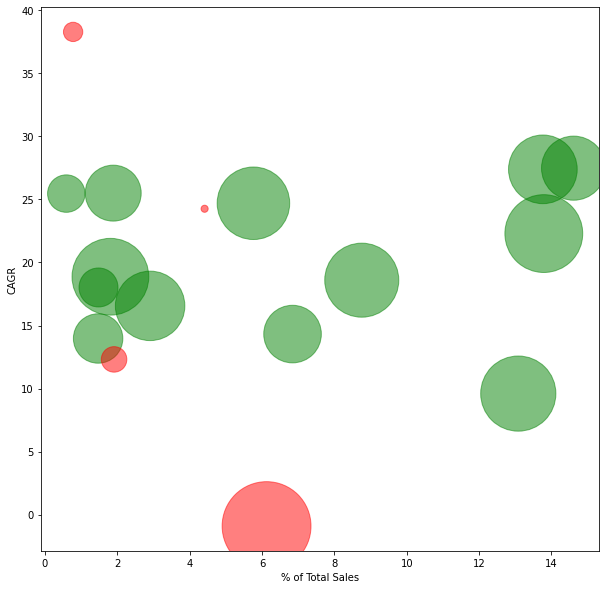

In [22]:
import seaborn as sns
plt.figure(figsize=(10,10))
d = plt.scatter('Percentage of Total Sales', 'CAGR', s = c['PMP']*350, alpha = 0.5, data = c, color = 'g')
d = plt.scatter('Percentage of Total Sales', 'CAGR', s = -c['PMN']*350, alpha = 0.5, data = c, color = 'r')
plt.xlabel('% of Total Sales')
plt.ylabel('CAGR')

